###  Airlines Data Analysis: occupancy rate - to - increased profitability 

<div class="alert alert-block alert-info">
<b>Objective:</b> 
   <p>The goal of this data analysis project using sql would be to identify opportunities to increase the occupancy rate on low-performing flights, which can ultimately lead to increased profitability for the airline.</p>
</div>

<div class="alert alert-block alert-info">
<b>Strategies:</b> 
   <p> 1. Increase occupancy rate: By increasing the occupancy rate, we can boost the average profit earned per seat and mitigate the impact of the challenges we're facing.</p>
<p>2. Improve pricing strategy: We need to develop a pricing strategy that takes into account the changing market conditions and customer preferences to attract and retain customers.</p>
<p>3. Enhance customer experience: We need to focus on providing a seamless and convenient experience for our customers, from booking to arrival, to differentiate ourselves in a highly competitive industry and increase customer loyalty.</p>
</div>




# Importing Libraries
* The sqlite3 module is part of the Python Standard Library and provides an interface to work with SQLite databases. SQLite is a lightweight, serverless database engine that allows to create, modify, and query databases using SQL.

In [23]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Database Connection

In [24]:
# create a cursor object that allows you to execute SQL statements and retrieve data from a SQLite database.
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

In [25]:
# extracting table names from the database
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
print('List of Tables present in the Database')
tables = [table[0] for table in cursor.fetchall()]
tables

List of Tables present in the Database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Data Exploration

In [26]:
# view the first and last few rows of each table

In [27]:
aircrafts_data = pd.read_sql_query(f"""SELECT * FROM aircrafts_data""", connection)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [28]:
aircrafts_data.tail()

,aircraft_code,model,range
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [29]:
airports_data = pd.read_sql_query(f"""SELECT * FROM airports_data""", connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [30]:
boarding_passes = pd.read_sql_query(f"""SELECT * FROM boarding_passes""", connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [31]:
bookings = pd.read_sql_query(f"""SELECT * FROM bookings """, connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [32]:
flights = pd.read_sql_query(f"""SELECT * FROM flights  """, connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [33]:
seats = pd.read_sql_query(f"""SELECT * FROM seats  """, connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [34]:
ticket_flights = pd.read_sql_query(f"""SELECT * FROM ticket_flights  """, connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [35]:
tickets = pd.read_sql_query(f"""SELECT * FROM tickets  """, connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


## *************************************************************

The PRAGMA table_info command is specific to SQLite and is used to retrieve information about the columns in a table. When executed, it returns a result set with the following columns:

* cid: The column ID.
* name: The column name.
* type: The data type of the column.
* notnull: A flag indicating if the column allows NULL values (0 for NULL values allowed, 1 for NOT NULL).
* dflt_value: The default value of the column.
* pk: A flag indicating if the column is part of the primary key (0 for non-primary key columns, 1 for primary key columns)

---

In [36]:
# retrieve the column information for a table in an SQLite database
for table in tables:
    print("\ntable: " + table)
    columns_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in columns_info.fetchall():
        print(column[1:3])


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

# Data Cleaning

In [37]:
# checking for missing values in each column for every table
for table in tables:
    print('\n Missing Values in table {table}')
    df_table = pd.read_sql_query(f"""SELECT * FROM {table}""", connection)
    print(df_table.isnull().sum())
    


 Missing Values in table {table}
aircraft_code    0
model            0
range            0
dtype: int64

 Missing Values in table {table}
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

 Missing Values in table {table}
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

 Missing Values in table {table}
book_ref        0
book_date       0
total_amount    0
dtype: int64

 Missing Values in table {table}
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

 Missing Values in table {table}
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

 Missing Values in table {table}
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

 Mis

There are no missing values in anyone of the tables

# Basic Analysis 

**How many planes have more than 100 seats?**

In [38]:
pd.read_sql_query(f"""SELECT aircraft_code, COUNT(*) as num_seats FROM seats 
                        GROUP BY aircraft_code 
                        HAVING num_seats > 100 
                        ORDER BY num_seats DESC""", connection)

,aircraft_code,num_seats
0,773,402
1,763,222
2,321,170
3,320,140
4,733,130
5,319,116


### NB:
In SQLite, you cannot directly use column aliases in the HAVING or ORDER BY clauses. This is because the column aliases are typically defined in the SELECT clause, and the HAVING and ORDER BY clauses are evaluated before the SELECT clause.

However, you can use column expressions or aggregate functions in the HAVING and ORDER BY clauses and provide them with the same expressions or functions used in the SELECT clause, effectively achieving a similar result.

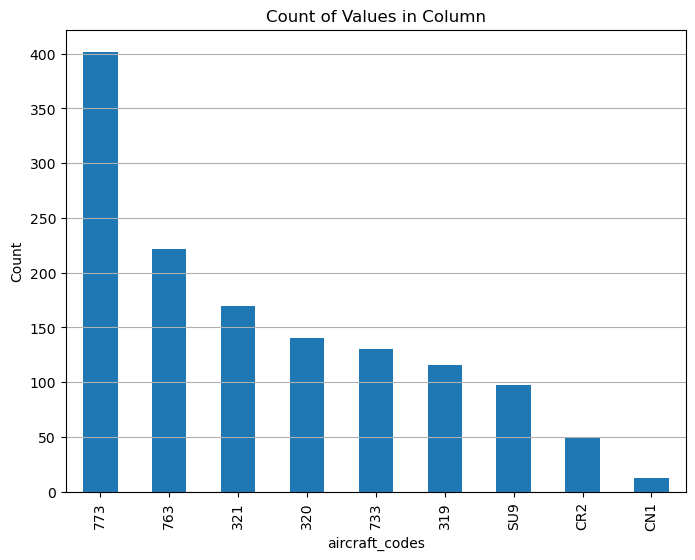

In [39]:
# plot the count of aircraft_code to see the num_seats graphically
value_counts = seats['aircraft_code'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
value_counts.plot(kind='bar')

# Optional: Add labels and title
plt.xlabel('aircraft_codes')
plt.ylabel('Count')
plt.title('Count of Values in Column')
plt.grid(axis='y')

# Show the plot
plt.show()

**How the number of tickets booked and total amount earned changed with the time.**

In [40]:
tickets = pd.read_sql_query(f"""SELECT *
                                    FROM tickets
                                    INNER JOIN bookings 
                                    ON tickets.book_ref=bookings.book_ref;""", connection)
tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03,12400
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03,12400
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03,24700
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03,24700
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03,30900
...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03,210600
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03,210600
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03,45900
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03,219400


In [41]:
# convert book_date column from timestamp to a pandas DateTime object
tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['book_date']

0        2017-07-05 20:19:00+03:00
1        2017-07-05 20:19:00+03:00
2        2017-06-29 01:55:00+03:00
3        2017-06-29 01:55:00+03:00
4        2017-07-03 04:37:00+03:00
                    ...           
366728   2017-08-14 11:50:00+03:00
366729   2017-08-14 11:50:00+03:00
366730   2017-08-13 03:49:00+03:00
366731   2017-08-15 15:54:00+03:00
366732   2017-08-15 15:54:00+03:00
Name: book_date, Length: 366733, dtype: datetime64[ns, pytz.FixedOffset(180)]

In [42]:
#  extract the date portion 
tickets['date'] = tickets['book_date'].dt.date
tickets['date'] 

0         2017-07-05
1         2017-07-05
2         2017-06-29
3         2017-06-29
4         2017-07-03
             ...    
366728    2017-08-14
366729    2017-08-14
366730    2017-08-13
366731    2017-08-15
366732    2017-08-15
Name: date, Length: 366733, dtype: object

In [43]:
# group the column by count
x =  tickets.groupby('date')[['date']].count()
x

,date
date,
2017-06-21,6
2017-06-22,12
2017-06-23,28
2017-06-24,106
2017-06-25,266
2017-06-26,499
2017-06-27,1028
2017-06-28,1678
2017-06-29,2765


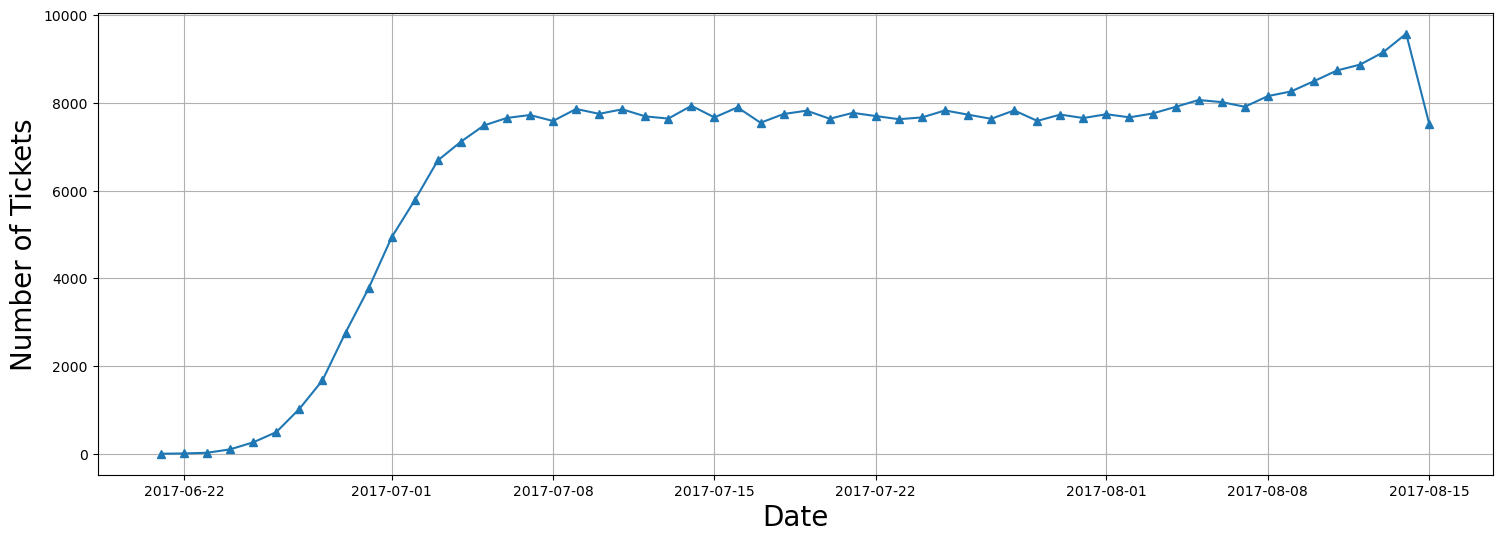

In [44]:
# plot this info
plt.figure(figsize = (18,6))
plt.plot(x.index,x['date'], marker = '^')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of Tickets', fontsize = 20)
plt.grid('b')
plt.show()

In [45]:
bookings = pd.read_sql_query(f"""SELECT * FROM bookings""", connection)
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
y =  bookings.groupby('date')[['total_amount']].sum()
y

,total_amount
date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400
2017-06-26,29049100
2017-06-27,54339900
2017-06-28,91256400
2017-06-29,152484000


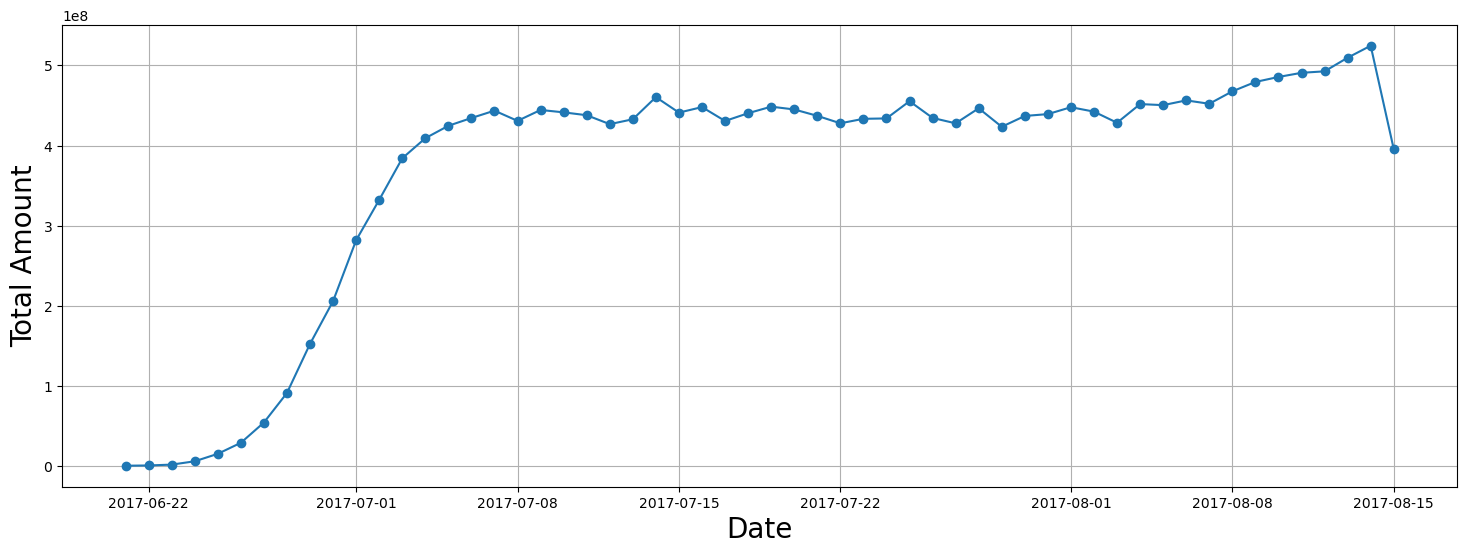

In [46]:
# plot it
plt.figure(figsize = (18,6))
plt.plot(y.index,y['total_amount'], marker = 'o')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Total Amount', fontsize = 20)
plt.grid('b')
plt.show()

> Upon analysis of the chart, we observe that the number of
tickets booked exhibits a gradual increase from June 22nd to July 7th,
followed by a relatively stable pattern from July 8th until August, with a
noticeable peak in ticket bookings where the highest number of tickets
were booked on a single day. It is important to note that the revenue earned
by the company from these bookings is closely tied to the number of
tickets booked. Therefore, we can see a similar trend in the total revenue
earned by the company throughout the analyzed time period.

>These findings suggest that further exploration of the factors contributing to the
peak in ticket bookings may be beneficial for increasing overall revenue and
optimizing operational strategies.

**Calculate the average charges for each aircraft with different fare conditions.**

In [47]:
df = pd.read_sql_query(f"""SELECT fare_conditions, aircraft_code, AVG(amount) as avg_amount FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code, fare_conditions""", connection)
df

,fare_conditions,aircraft_code,avg_amount
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


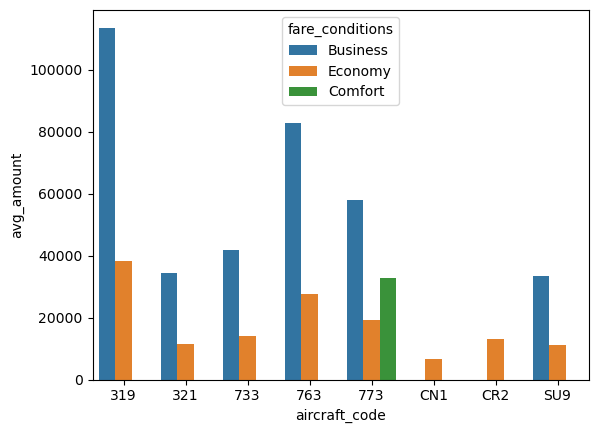

In [48]:
# plot the info
sns.barplot(data = df, x = 'aircraft_code', y ='avg_amount', hue = 'fare_conditions')
plt.show()

> The graph  shows data for three types of fares: business, economy, and comfort. It is worth
mentioning that the comfort class is available on only one aircraft, the 773.

> The CN1 and CR2 planes, on the other hand, only provide the economy
class. When different pricing circumstances within each aircraft are
compared, the charges for business class are consistently greater than
those for economy class.

> This trend may be seen across all planes,regardless of fare conditions

# Analyzing occupancy rate

**For each aircraft, calculate the total revenue per year and the average revenue per ticket.**

In [49]:
# display the floating-point numbers as strings
pd.set_option('display.float_format', str)

In [50]:
pd.read_sql_query(f"""SELECT aircraft_code, total_revenue, ticket_count, total_revenue/ticket_count as avg_revenue_per_ticket
                        FROM 
                        (SELECT aircraft_code, COUNT(*) as ticket_count, SUM(amount) as total_revenue  FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code)""", connection)

,aircraft_code,total_revenue,ticket_count,avg_revenue_per_ticket
0,319,2706163100,52853,51201
1,321,1638164100,107129,15291
2,733,1426552100,86102,16568
3,763,4371277100,124774,35033
4,773,3431205500,144376,23765
5,CN1,96373800,14672,6568
6,CR2,1982760500,150122,13207
7,SU9,5114484700,365698,13985


> The chart  shows the total revenue, total tickets and average revenue made per ticket for
each aircraft. The aircraft with the highest total revenue is SU9 and from
the previous graph, it can be seen that the price of the business class and economy
class is the lowest in this aircraft. This can be the reason that most of the
people bought this aircraft ticket as its cost is less compared to others. The
aircraft with least total revenue is CN1, and the possible reason behind this
is it only offers economy class with very least price and it might be because
of its poor conditions or less facilities.

**Calculate the average occupancy per aircraft.**

In [51]:
a=pd.read_sql_query(f"""SELECT aircraft_code, flights.flight_id, COUNT(*) as seats_count
                                FROM boarding_passes
                                INNER JOIN flights 
                                ON boarding_passes.flight_id=flights.flight_id
                               
                                GROUP BY aircraft_code, flights.flight_id""", connection)
a

,aircraft_code,flight_id,seats_count
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58
...,...,...,...
11513,SU9,32925,12
11514,SU9,32928,25
11515,SU9,32931,12
11516,SU9,32933,16


In [52]:
b= pd.read_sql_query(f"""SELECT aircraft_code, COUNT(*) as num_seats FROM seats 
                                GROUP BY aircraft_code""", connection)
b

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [53]:
occupancy_rate = pd.read_sql_query(f"""SELECT a.aircraft_code, AVG(a.seats_count) as booked_seats, b.num_seats, 
AVG(a.seats_count)/b.num_seats as occupancy_rate
                            FROM (
                                SELECT aircraft_code, flights.flight_id, COUNT(*) as seats_count
                                FROM boarding_passes
                                INNER JOIN flights 
                                ON boarding_passes.flight_id=flights.flight_id
                                GROUP BY aircraft_code, flights.flight_id
                                ) as a INNER JOIN
                                (
                                SELECT aircraft_code, COUNT(*) as num_seats FROM seats 
                                GROUP BY aircraft_code  
                                ) as b
                                ON a.aircraft_code = b.aircraft_code
                            GROUP BY a.aircraft_code""", connection)
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.58318098720292,116,0.46192397402761143
1,321,88.80923076923077,170,0.5224072398190045
2,733,80.25546218487395,130,0.617349709114415
3,763,113.93729372937294,222,0.5132310528350132
4,773,264.9258064516129,402,0.659019419033863
5,CN1,6.004431314623338,12,0.5003692762186115
6,CR2,21.48284690220174,50,0.42965693804403476
7,SU9,56.81211267605634,97,0.5856918832583128


> The table shows the average booked seats from the total number of seats for each aircraft. The occupancy rate is calculated
by dividing the booked seats by the total number of seats. Higher occupancy rate means the aircraft seats are more booked and only few seats are left unbooked.


**Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.**
* turnover=the amount of money generated by a business through its operations


In [54]:
occupancy_rate['Inc occupancy rate'] = occupancy_rate['occupancy_rate'] + occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144


In [55]:
total_revenue = pd.read_sql_query("""SELECT aircraft_code, SUM(amount) as total_revenue  FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code""", connection)

occupancy_rate['Inc Total Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['Inc occupancy rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999


> The figure shows how the total revenue increased after increasing the occupancy rate by 10% and it gives the result that it will increase gradually so airlines should be more focused on the pricing strategies.

---

## Conclusions
* Analyzing revenue data such as total revenue per year, average revenue per ticket, and average occupancy per aircraft is critical for airlines seeking to maximize profitability. Airlines can find areas for improvement and modify their pricing and route plans as a result of assessing these indicators. A greater occupancy rate is one important feature that can enhance profitability since it allows airlines to maximize revenue while minimizing costs associated with vacant seats. The airline should revise the price for each aircraft as the lower price and high price is also the factor that people are not buying tickets from those aircrafts. They should decide the reasonable price according to the condition and facility of the aircraft and it should not be very cheap or high.

* In addition, boosting occupancy rates should not come at the price of consumer happiness or safety. Airlines must strike a balance between the necessity for profit and the significance of delivering high-quality service and upholding safety regulations. Airlines may achieve long-term success in a highly competitive business by adopting a data-driven strategy to revenue analysis and optimisation.